# Vanishing/Exploding Gradients Problem

خب در این notebbok قراره  روی موضوغ Vanishing/Explofing  Gradient Problem 

اول به توضبخ مخصتر که چرا داره این اتفاق می افته 

<div style="direction: rtl; text-align: justify; font-family: 'Tahoma', 'Arial'; line-height: 1.8; color: #2c3e50;">

<div style="background-color: #f0f7ff; padding: 20px; border-right: 8px solid #3498db; border-radius: 10px; margin-bottom: 20px; box-shadow: 2px 2px 5px rgba(0,0,0,0.05);">
    <h2 style="color: #2980b9; margin-top: 0;">📉 محوشدن گرادیان (Vanishing Gradient)</h2>
    <p>
    در شبکه‌های عمیق با تابع فعال‌سازی <b>سیگموید</b>، مشتق تابع حداکثر <b>۰.۲۵</b> است. با ضرب شدن این مقادیر کوچک در لایه‌های مختلف (طبق قانون زنجیره‌ای)، گرادیان به عددی نزدیک صفر می‌رسد و اصطلاحاً «محو» می‌شود. 
    </p>
    <p style="font-style: italic; color: #34495e;">
    <b>نتیجه:</b> وزن‌های لایه‌های اولیه به‌روزرسانی نمی‌شوند و شبکه عملاً قادر به یادگیری الگوهای پیچیده نخواهد بود.
    </p>
</div>



<div style="background-color: #fff5f5; padding: 20px; border-right: 8px solid #e74c3c; border-radius: 10px; margin-bottom: 20px; box-shadow: 2px 2px 5px rgba(0,0,0,0.05);">
    <h2 style="color: #c0392b; margin-top: 0;">💥 انفجار گرادیان (Exploding Gradient)</h2>
    <p>
    برعکس حالت قبل، وقتی وزن‌ها بسیار بزرگ انتخاب شوند یا از توابع فعال‌سازی استفاده شود که مشتق آن‌ها از <b>۱</b> بیشتر است، حاصل‌ضرب زنجیره‌ای گرادیان‌ها به اعداد بسیار بزرگ تبدیل می‌شود. 
    </p>
    <p style="font-style: italic; color: #34495e;">
    <b>نتیجه:</b> وزن‌ها با گام‌های بسیار بلند به‌روزرسانی شده، شبکه دچار بی‌ثباتی می‌شود و به جای همگرایی به سمت کمینه (Minimum)، مقدار خطا به سمت بی‌نهایت میل می‌کند.
    </p>
</div>

<div style="text-align: center; background: #fdfefe; border: 1px dashed #bdc3c7; padding: 10px; border-radius: 5px;">
    ⚠️ <b>خلاصه:</b> هر دو مشکل کارایی شبکه عمیق را کاهش می‌دهند؛ یکی یادگیری را <b>متوقف</b> می‌کند و دیگری آن را <b>بی‌ثبات</b> می‌سازد.
</div>

</div>


<div style="
    background-color: #f8f9fa; 
    border-left: 8px solid #2196F3; 
    padding: 20px; 
    border-radius: 10px; 
    box-shadow: 2px 2px 10px rgba(0,0,0,0.1);
    direction: rtl; 
    font-family: 'Tahoma', 'Arial', sans-serif;
    line-height: 1.8;">
    <h2 style="color: #1565C0; margin-top: 0;">پروژه بررسی شبکه‌های عصبی عمیق</h2>
    <p style="font-size: 1.1em; color: #333;">
        من در این‌جا فقط روی <strong>MLP (Multi-Layer Perceptron)</strong> کار می‌کنم 
        و شبکه‌های عمیق MLP را مورد بررسی قرار می‌دهم.
    </p>
    <div style="text-align: center; margin-top: 20px;">
        <img src="https://howsam.org/wp-content/uploads/2020/06/mlp.png" 
             alt="MLP Structure" 
             style="width: 300px; border-radius: 5px; background: white; padding: 10px; border: 1px solid #ddd;">
    </div>
</div>

<div style="direction: rtl; font-family: 'Tahoma', 'Arial', sans-serif; background: #f0f2f5; padding: 20px; border-radius: 20px; line-height: 1.8; max-width: 1100px; margin: auto; color: #333;">
    <h2 style="text-align: center; color: #1a2a6c; border-bottom: 4px solid #f27121; display: table; margin: 0 auto 30px; padding-bottom: 10px;">
        🔥 مقایسه ReLU و Sigmoid
    </h2>
    <div style="display: flex; flex-wrap: wrap; gap: 20px; justify-content: center;">
 <div style="flex: 1 1 300px; background: white; padding: 25px; border-radius: 18px; border-top: 8px solid #00b894; box-shadow: 0 10px 20px rgba(0,0,0,0.05); transition: 0.3s;">
            <h3 style="color: #00b894; margin-top: 0; display: flex; align-items: center; gap: 8px;">🟢 تابع ReLU</h3>
            <p><strong>فرمول ریاضی:</strong></p>
            <div style="background: #f8f9fa; padding: 12px; border-radius: 10px; text-align: center; font-family: 'Courier New', monospace; font-weight: bold; font-size: 1.1em; color: #2d3436;">
                f(x) = max(0 , x)
            </div>
            <ul style="padding-right: 20px; margin-top: 15px;">
                <li>بازه خروجی: <span style="direction: ltr; display: inline-block;">[0 , +∞)</span></li>
                <li><b>سرعت محاسباتی:</b> بسیار بالا</li>
                <li>مقاوم در برابر <b>Vanishing Gradient</b></li>
                <li>استاندارد لایه‌های مخفی (Hidden)</li>
                <li style="color: #d63031;">مشکل: <b>Dying ReLU</b></li>
            </ul>
        </div>
        <div style="flex: 1 1 300px; background: white; padding: 25px; border-radius: 18px; border-top: 8px solid #0984e3; box-shadow: 0 10px 20px rgba(0,0,0,0.05);">
            <h3 style="color: #0984e3; margin-top: 0; display: flex; align-items: center; gap: 8px;">🔵 تابع Sigmoid</h3>
            <p><strong>فرمول ریاضی:</strong></p>
            <div style="background: #f8f9fa; padding: 12px; border-radius: 10px; text-align: center; font-family: 'Courier New', monospace; font-weight: bold; font-size: 1.1em; color: #2d3436;">
                f(x) = 1 / (1 + e<sup>-x</sup>)
            </div>
            <ul style="padding-right: 20px; margin-top: 15px;">
                <li>بازه خروجی: <span style="direction: ltr; display: inline-block;">(0 , 1)</span></li>
                <li><b>سرعت محاسباتی:</b> کند (به دلیل توان)</li>
                <li style="color: #d63031;">دارای مشکل <b>Vanishing Gradient</b></li>
                <li>مناسب لایه خروجی (Binary Class)</li>
                <li>اشباع در مقادیر بسیار بزرگ یا کوچک</li>
            </ul>
        </div>
    </div>
    <hr style="margin: 50px 0; border: none; height: 1px; background: linear-gradient(to right, transparent, #ccc, transparent);">
    <h2 style="text-align: center; color: #1a2a6c; border-bottom: 4px solid #e17055; display: table; margin: 0 auto 30px; padding-bottom: 10px;">
        ⚙️ وزن‌دهی اولیه: Xavier vs He
    </h2>
    <div style="display: flex; flex-wrap: wrap; gap: 20px; justify-content: center;">
        <div style="flex: 1 1 300px; background: white; padding: 25px; border-radius: 18px; border-top: 8px solid #6c5ce7; box-shadow: 0 10px 20px rgba(0,0,0,0.05);">
            <h3 style="color: #6c5ce7; margin-top: 0;">🟣 Xavier (Glorot)</h3>
            <div style="background: #f1f2f6; padding: 12px; border-radius: 10px; text-align: center; font-weight: bold; color: #2d3436; margin-bottom: 15px;">
                Var(W) = 1 / (n<sub>in</sub> + n<sub>out</sub>)
            </div>
            <ul style="padding-right: 20px;">
                <li>بهینه برای <b>Sigmoid</b> و <b>Tanh</b></li>
                <li>ثابت نگه داشتن واریانس لایه‌ها</li>
                <li>جلوگیری از اشباع زودرس نورون‌ها</li>
                <li>ایده‌آل برای شبکه‌های با عمق متوسط</li>
            </ul>
        </div>
  <div style="flex: 1 1 300px; background: white; padding: 25px; border-radius: 18px; border-top: 8px solid #d63031; box-shadow: 0 10px 20px rgba(0,0,0,0.05);">
            <h3 style="color: #d63031; margin-top: 0;">🔴 He Initialization</h3>
            <div style="background: #f1f2f6; padding: 12px; border-radius: 10px; text-align: center; font-weight: bold; color: #2d3436; margin-bottom: 15px;">
                Var(W) = 2 / n<sub>in</sub>
            </div>
            <ul style="padding-right: 20px;">
                <li>بهترین انتخاب برای <b>ReLU</b></li>
                <li>جبران اثر حذف مقادیر منفی در ReLU</li>
                <li>ضروری برای <b>شبکه‌های بسیار عمیق</b> (ResNet)</li>
                <li>پایداری بسیار بالا در فرآیند آموزش</li>
            </ul>
        </div>
    </div>
    <div style="margin-top: 40px;color:black; background: linear-gradient(135deg, #6c5ce7, #a29bfe); padding: 25px; border-radius: 18px;text-align: center; box-shadow: 0 10px 20px rgba(108, 92, 231, 0.3);">
        <p style="font-size: 1.1em; margin-bottom: 0;">
            <span style="background: rgba(255,255,255,0.2); padding: 5px 12px; border-radius: 8px;">لایه‌های مخفی: <b>ReLU + He</b></span>
            <span style="margin: 0 10px;">|</span>
            <span style="background: rgba(255,255,255,0.2); padding: 5px 12px; border-radius: 8px;">لایه خروجی: <b>Sigmoid + Xavier</b></span>
        </p>
    </div>

</div>

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
# import kerastuner as kt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.calibration import calibration_curve
# from keras.callbacks import EalrlyStopping
# from keras.models import Mode
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import cv2
import matplotlib.patches as patches
import torch
import os
import time

/usr/local/lib/python3.12/site-packages/jax/_src/cloud_tpu_init.py:93: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


<div style="direction: rtl; font-family: 'Tahoma', sans-serif; color:black;border: 2px solid #eceff1; border-radius: 15px; overflow: hidden; box-shadow: 0 4px 6px rgba(0,0,0,0.1); max-width: 600px; margin: 20px auto;">
    <div style="background-color: #455a64; color: white; padding: 15px; text-align: center;">
        <h3 style="margin: 0;">📊 آمار توزیع داده‌های ورودی (دیتاست)</h3>
    </div>
    <div style="padding: 20px; background-color: #fafafa;"> 
        <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 10px; padding: 10px; background: white; border-radius: 8px; border-right: 5px solid #4caf50;">
            <span style="font-weight: bold; color: #2e7d32;">بدون سکته:</span>
            <span style="font-family: 'Consolas', monospace; font-size: 1.2em;">4,428</span>
        </div>
        <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 10px; padding: 10px; background: white; border-radius: 8px; border-right: 5px solid #ff9800;">
            <span style="font-weight: bold; color: #ef6c00;">ایسکمی (Ischemia):</span>
            <span style="font-family: 'Consolas', monospace; font-size: 1.2em;">1,131</span>
        </div>
        <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 10px; padding: 10px; background: white; border-radius: 8px; border-right: 5px solid #f44336;">
            <span style="font-weight: bold; color: #c62828;">خونریزی (Bleeding):</span>
            <span style="font-family: 'Consolas', monospace; font-size: 1.2em;">1,094</span>
        </div>
    </div>
    <div style="background-color: #f1f1f1; padding: 10px; text-align: left; font-size: 0.85em; color: #555;">
    </div>
</div>

In [2]:
path = "/kaggle/input/brain-stroke-ct-dataset/Brain_Stroke_CT_Dataset" 

In [3]:
from IPython.display import display, HTML
import os

path = "/kaggle/input/brain-stroke-ct-dataset/Brain_Stroke_CT_Dataset" 
detection = [class_name for class_name in os.listdir(path) if class_name != "External_Test"]

html_content = f"""
<div style="direction: rtl; font-family: 'Tahoma', sans-serif; padding: 15px; background-color: #f0f4f8; border-radius: 10px; border-right: 8px solid #007bff;">
    <ul style="margin-top: 10px; list-style-type: none;">
        {''.join([f'<li style="background: white; margin: 5px; padding: 8px; border-radius: 5px; box-shadow: 1px 1px 3px rgba(0,0,0,0.1); display: inline-block; min-width: 120px; text-align: center; color: #333;">✅ {name}</li>' for name in detection])}
    </ul>
</div>
"""

display(HTML(html_content))

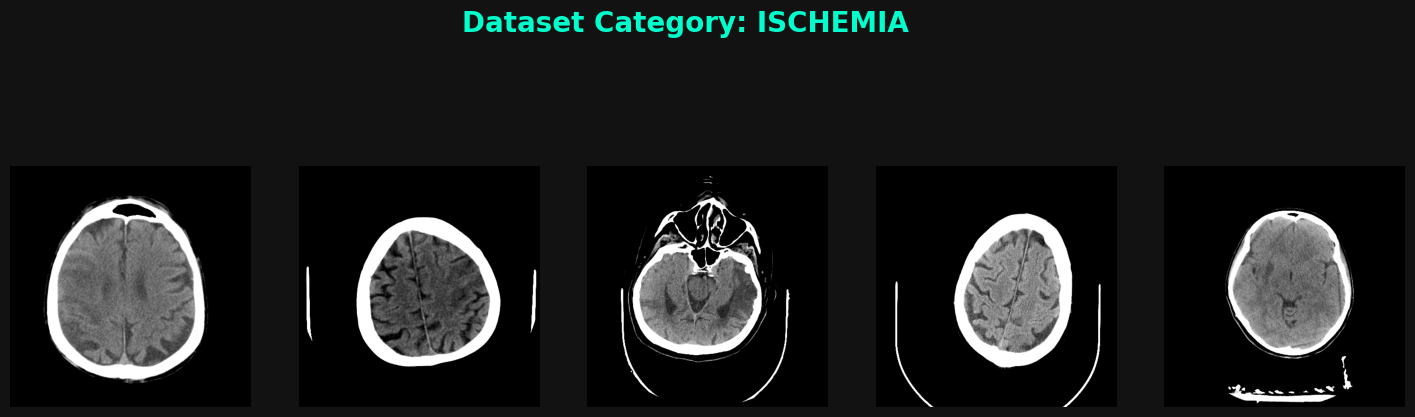

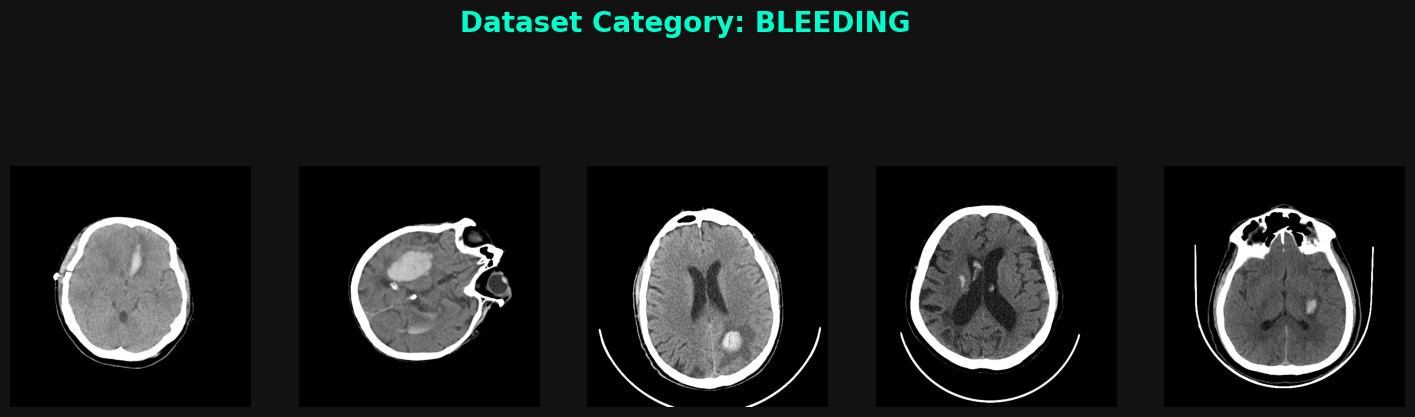

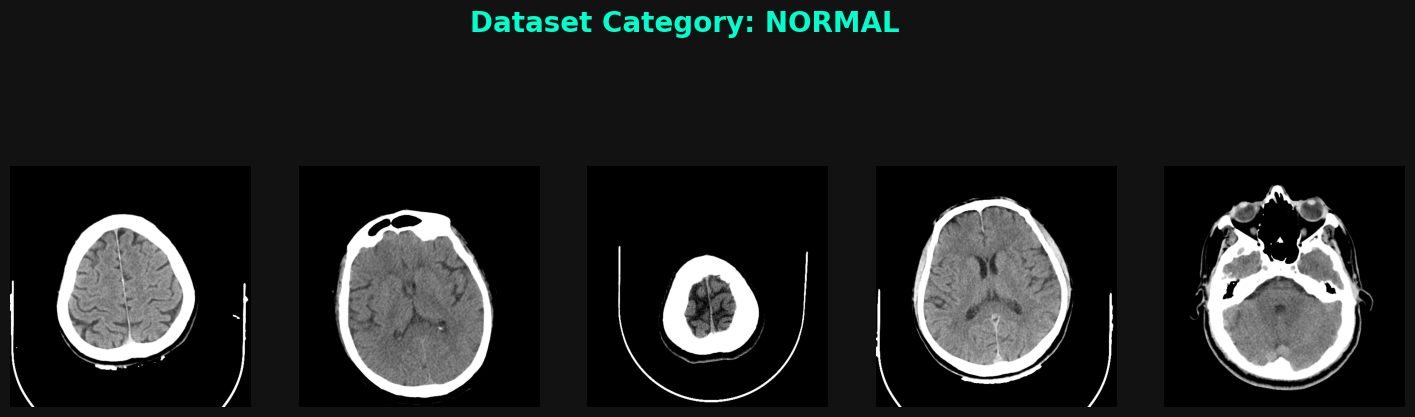

In [4]:
for cls in detection:
    if cls == "External_Test":  
        continue
    folder = os.path.join(path, cls,"PNG")
    images = sorted(os.listdir(folder))

    fig, axes = plt.subplots(1, 5, figsize=(18, 5), facecolor='#121212')
    fig.suptitle(f"Dataset Category: {cls.upper()}",
                 fontsize=20, weight="black", color='#00FFCC', y=1.05)

    for ax, img_name in zip(axes, images[0:0 + 5]):
        img_path = os.path.join(folder, img_name)
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)  
        ax.imshow(img)
        ax.axis('off')  \

    plt.show()


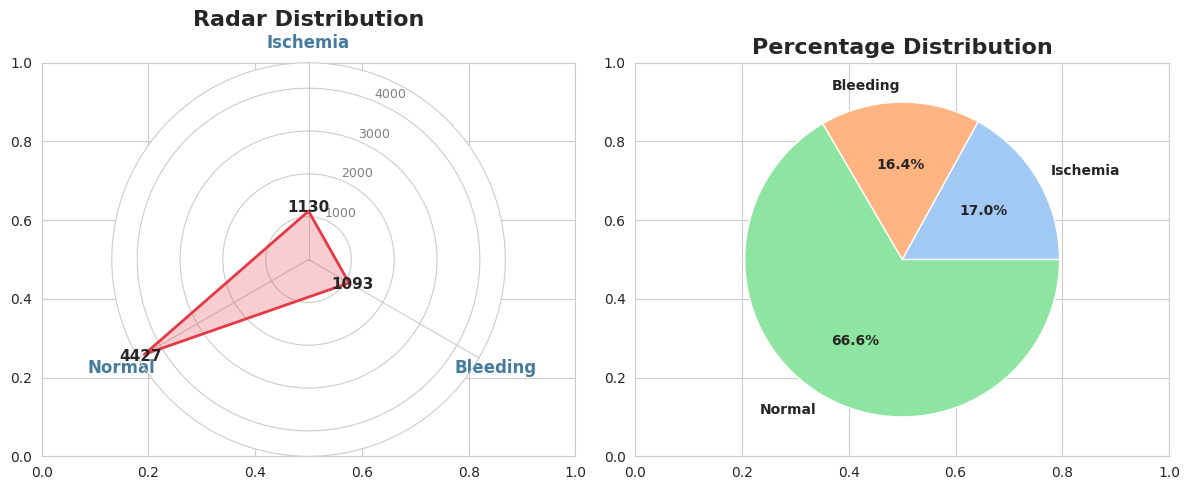

In [5]:

classes = [cls for cls in detection if cls != "External_Test"]
image_counts = [len(os.listdir(os.path.join(path, cls, "PNG"))) for cls in classes]
# Radar
angles = np.linspace(0, 2*np.pi, len(classes), endpoint=False).tolist()
plot_counts = image_counts + [image_counts[0]]
plot_angles = angles + [angles[0]]

sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw=dict(polar=False))

ax_r = fig.add_subplot(121, polar=True)
ax_r.set_theta_offset(np.pi/2); ax_r.set_theta_direction(-1)
ax_r.plot(plot_angles, plot_counts, color='#E63946', lw=2)
ax_r.fill(plot_angles, plot_counts, color='#E63946', alpha=0.25)
for i, c in enumerate(image_counts):
    ax_r.text(angles[i], c+max(image_counts)*0.02, str(c), ha='center', va='center', weight='bold', size=11)
ax_r.set_xticks(angles); ax_r.set_xticklabels(classes, fontsize=12, fontweight='bold', color='#457B9D')
plt.yticks(color='grey', size=9); ax_r.set_title("Radar Distribution", size=16, weight='bold')

# Pie 
ax2 = fig.add_subplot(122)
ax2.pie(image_counts, labels=classes, autopct='%1.1f%%', colors=sns.color_palette("pastel"), textprops={'weight':'bold'})
ax2.set_title("Percentage Distribution", size=16, weight='bold')

plt.tight_layout()
plt.show()


<div dir="rtl" style="font-family:'Tahoma';color:#000;border:1px solid #000;border-radius:10px;padding:15px;background-color:#fff;"><h2 style="color:#000;text-align:center;margin-bottom:10px;border-bottom:2px solid #000;padding-bottom:5px;">📊 تحلیل توزیع کلاس‌های دیتاست</h2><table style="width:100%;border-collapse:collapse;color:#000;"><thead><tr style="background-color:#eee;border-bottom:2px solid #000;"><th style="padding:8px;text-align:center;">وضعیت</th><th style="padding:8px;text-align:center;">نام کلاس</th><th style="padding:8px;text-align:center;">تعداد نمونه</th><th style="padding:8px;text-align:center;">سهم از کل</th></tr></thead><tbody><tr style="border-bottom:1px solid #000;"><td style="padding:8px;text-align:center;">✅ اکثریت</td><td style="padding:8px;text-align:center;font-weight:bold;">بدون سکته</td><td style="padding:8px;text-align:center;">۴,۴۲۸</td><td style="padding:8px;width:35%;"><div style="background:#ccc;border-radius:5px;height:12px;width:100%;"><div style="background:#000;height:12px;width:66.5%;border-radius:5px;"></div></div><small>۶۶.۵٪</small></td></tr><tr style="border-bottom:1px solid #000;"><td style="padding:8px;text-align:center;">⚠️ اقلیت</td><td style="padding:8px;text-align:center;font-weight:bold;">ایسکمی (Ischemia)</td><td style="padding:8px;text-align:center;">۱,۱۳۱</td><td style="padding:8px;"><div style="background:#ccc;border-radius:5px;height:12px;width:100%;"><div style="background:#000;height:12px;width:17%;border-radius:5px;"></div></div><small>۱۷٪</small></td></tr><tr style="border-bottom:1px solid #000;"><td style="padding:8px;text-align:center;">⚠️ اقلیت</td><td style="padding:8px;text-align:center;font-weight:bold;">خونریزی (Bleeding)</td><td style="padding:8px;text-align:center;">۱,۰۹۴</td><td style="padding:8px;"><div style="background:#ccc;border-radius:5px;height:12px;width:100%;"><div style="background:#000;height:12px;width:16.5%;border-radius:5px;"></div></div><small>۱۶.۵٪</small></td></tr></tbody></table><div style="margin-top:10px;padding:10px;border:1px solid #000;font-size:0.9em;"><strong>نکته فنی:</strong> به دلیل نامتوازنی، مدل ممکن است به سمت کلاس اکثریت سوگیری کند. استفاده از وزن‌دهی کلاس‌ها (Class Weights) در آموزش MLP توصیه می‌شود.</div></div>

In [6]:
# -------------------------- بارگذاری تصویر --------------------------
img = "/kaggle/input/brain-stroke-ct-dataset/Brain_Stroke_CT_Dataset/Bleeding/PNG/10002.png"
img = cv2.imread(img)
img.shape

(512, 512, 3)

<div dir="rtl" style="font-family:'Tahoma';color:#fff;border:2px solid #2ecc71;border-radius:10px;padding:15px;background-color:#1a1a1a;"><h2 style="color:#2ecc71;text-align:center;margin-bottom:10px;border-bottom:2px solid #2ecc71;padding-bottom:5px;"></h2><table style="width:100%;border-collapse:collapse;color:#fff;text-align:center;"><thead><tr style="background-color:#2ecc71;color:#000;"><th style="padding:10px;border:1px solid #444;">عملیات</th><th style="padding:10px;border:1px solid #444;">توضیحات فنی</th><th style="padding:10px;border:1px solid #444;">ابعاد خروجی</th></tr></thead><tbody><tr><td style="padding:10px;border:1px solid #444;background-color:#2c3e50;"><b>تغییر سایز (Resizing)</b></td><td style="padding:10px;border:1px solid #444;">کاهش از 512x512 به 224x224 برای بهینه‌سازی سرعت شبکه MLP</td><td style="padding:10px;border:1px solid #444;color:#f1c40f;font-weight:bold;">224x224</td></tr><tr><td style="padding:10px;border:1px solid #444;background-color:#2c3e50;"><b>بهبود کنتراست</b></td><td style="padding:10px;border:1px solid #444;">استفاده از CLAHE یا Histogram Equalization برای برجسته‌سازی ضایعات</td><td style="padding:10px;border:1px solid #444;color:#f1c40f;font-weight:bold;">224x224</td></tr></tbody></table></div>

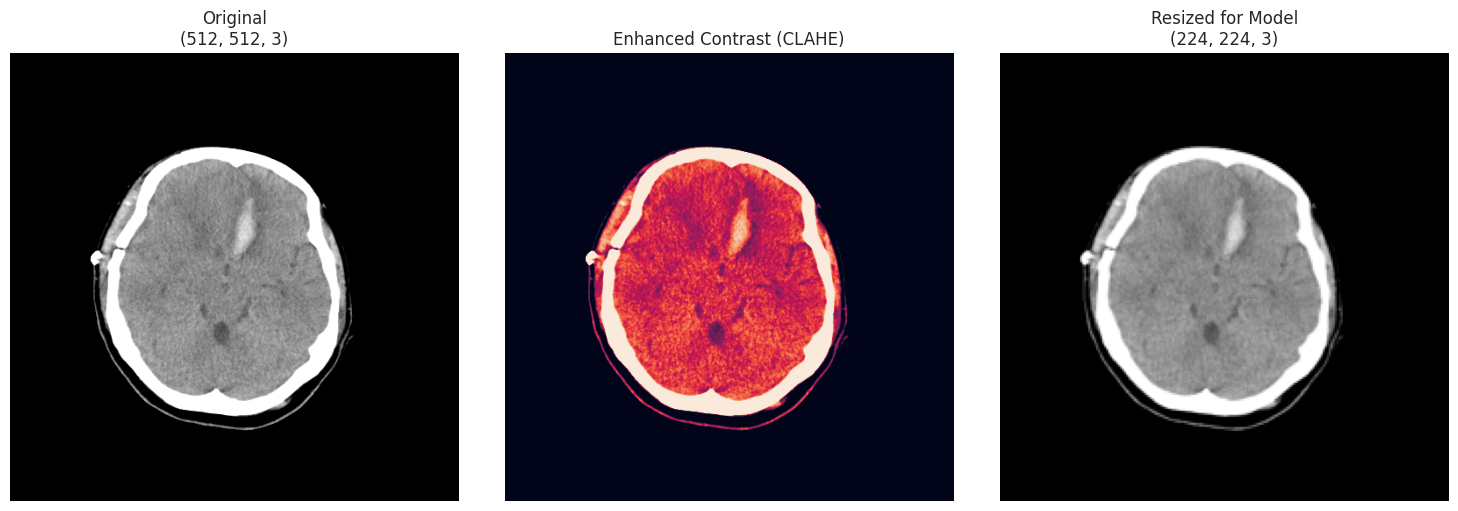

In [7]:
# -------------------------- افزایش کنتراست --------------------------
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced_img = clahe.apply(img if len(img.shape) == 2 else cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))

# -------------------------- تغییر اندازه --------------------------
resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)

# -------------------------- نمایش تصاویر --------------------------
images = [img, enhanced_img, resized] # ارایه برای هز 3 بخش 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = [f"Original\n{img.shape[:]}",
          "Enhanced Contrast (CLAHE)",
          f"Resized for Model\n{resized.shape[:]}"]
for ax, im, title in zip(axes, images, titles):
    ax.imshow(im)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

<div id="Feature" style="    
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #4ac200;
    box-shadow: 0 0 20px rgba(74, 194, 0, 0.2), inset 0 0 5px rgba(74, 194, 0, 0.1);   
    color: #4ac200;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(74, 194, 0, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #4ac200; box-shadow: 0 0 10px #4ac200;"></div>   
MLP model
</div>

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
my_list = []
for class_name in detection :
    class_path = os.path.join(path, class_name,"PNG")
    files = os.listdir(class_path)
    for file in files :
        file_path = os.path.join(class_path, file)
        my_list.append((file_path, class_name))

# Convert the list to a pandas DataFrame
df = pd.DataFrame(my_list, columns=['file_path', 'label'])

# Shuffle the dataframe rows
df = df.sample(frac=1).reset_index(drop=True)
display(df["label"].value_counts())
df.head()

label
Normal      4427
Ischemia    1130
Bleeding    1093
Name: count, dtype: int64

,file_path,label
0,/kaggle/input/brain-stroke-ct-dataset/Brain_St...,Bleeding
1,/kaggle/input/brain-stroke-ct-dataset/Brain_St...,Normal
2,/kaggle/input/brain-stroke-ct-dataset/Brain_St...,Normal
3,/kaggle/input/brain-stroke-ct-dataset/Brain_St...,Normal
4,/kaggle/input/brain-stroke-ct-dataset/Brain_St...,Ischemia


In [10]:
train_df, temp_df = train_test_split(
    df,
    test_size=0.3,
    random_state=42,
    stratify=df["label"]
)

valid_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=42,
    stratify=temp_df["label"]
)

بهترین betch

In [11]:
dataset_size = len(df)  
batch_size = max(16, min(128, dataset_size // 100))
print(batch_size)


66


افزایش کنراست 

In [12]:
def apply_clahe(img):
    img = img.astype("uint8")
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)
    # برگردوندن به 3 کانال تا با مدل هماهنگ باشه
    enhanced = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB)
    return enhanced / 255.0

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
# Set the image size and batch size
image_size = (224, 224)
batch_size = 64
datagen = ImageDataGenerator(
    preprocessing_function=apply_clahe
)
# Create a generator for the training data
Train = datagen.flow_from_dataframe(
    train_df,
    x_col='file_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the validation data
Validation = datagen.flow_from_dataframe(
    valid_df,
    x_col='file_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Create a generator for the test data
Test = datagen.flow_from_dataframe(
    test_df,
    x_col='file_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 4655 validated image filenames belonging to 3 classes.
Found 997 validated image filenames belonging to 3 classes.
Found 998 validated image filenames belonging to 3 classes.


In [15]:
print(Train.class_indices)


{'Bleeding': 0, 'Ischemia': 1, 'Normal': 2}


<div style="direction: rtl; font-family: Tahoma, Arial, sans-serif; line-height: 1.8; 
            border: 2px solid #4A90E2; border-radius: 12px; padding: 25px; 
            background-color: #f9fbfd; color: #333; max-width: 800px; margin: 20px auto;">
    <h2 style="color: #2c3e50; border-bottom: 2px solid #4A90E2; padding-bottom: 10px;">
        بررسی تابع Softmax
    </h2>
    <!-- کاربرد -->
    <div style="padding: 15px; background: #fff; border-right: 5px solid #4A90E2; 
                border-radius: 4px; margin-bottom: 20px;">
        <h3 style="color: #e67e22;">۱. کاربرد</h3>
        <p>Softmax معمولاً در <strong>لایه خروجی</strong> شبکه عصبی قرار می‌گیرد 
           و اعداد خام (Logits) را به <strong>احتمال هر کلاس</strong> تبدیل می‌کند.</p>
        <ul>
            <li>خروجی هر کلاس بین <strong>0 و 1</strong> است.</li>
            <li>مجموع تمام خروجی‌ها دقیقاً برابر با <strong>1</strong> می‌شود.</li>
        </ul>
    </div>
    <!-- فرمول -->
    <div style="padding: 15px; background: #fff; border-right: 5px solid #8e44ad; 
                border-radius: 4px; margin-bottom: 20px;">
        <h3 style="color: #8e44ad;">۲. فرمول Softmax</h3>
        <img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/60d24ae385bcde8513aeb8c4_pasted%20image%200%20%2815%29.jpg" 
             style="max-width: 100%; border-radius: 8px; margin: 10px 0; display: block;">
        <div style="direction: ltr; background: #eee; padding: 10px; border-radius: 5px; 
                    text-align: center; font-weight: bold; font-family: serif; font-size: 1.2em;">
            σ(z)ᵢ = e^(zᵢ) / Σⱼ e^(zⱼ)
        </div>
        <ul>
            <li><strong>zᵢ</strong> = عدد خام (Logit) برای کلاس i</li>
            <li><strong>Σⱼ e^(zⱼ)</strong> = مجموع نمایی تمام کلاس‌ها</li>
            <li><strong>σ(z)ᵢ</strong> = احتمال پیش‌بینی مدل برای کلاس i</li>
        </ul>
    </div>
    <!-- توضیح ساده -->
    <div style="padding: 15px; background: #fff; border-right: 5px solid #27ae60; 
                border-radius: 4px; margin-bottom: 20px;">
        <h3 style="color: #27ae60;">۳. توضیح ساده</h3>
        <p>
            - هر عدد خام zᵢ با e^(zᵢ) تبدیل می‌شود تا همه مقادیر <strong>مثبت</strong> شوند.<br>
            - سپس بر مجموع e^(zⱼ) تقسیم می‌شود تا جمع کل = <strong>۱</strong> شود.<br>
            - نتیجه: یک <strong>توزیع احتمال</strong> روی همه کلاس‌ها.
        </p>
        <div style="background: #eafaf1; padding: 10px; border-radius: 6px; 
                    direction: ltr; font-family: monospace;">
            logits = [1, 2, 3]  →  Softmax ≈ [0.09, 0.24, 0.67]  →  sum = 1.0 ✓
        </div>
        <br>
        <p><strong>دلایل استفاده از exp:</strong></p>
        <ul>
            <li>احتمال نمی‌تواند منفی باشد.</li>
            <li>اختلاف‌ها را تقویت می‌کند.</li>
        </ul>
    </div>
    <!-- Cross Entropy -->
    <div style="padding: 15px; background: #fff; border-right: 5px solid #e74c3c; 
                border-radius: 4px;">
        <h3 style="color: #e74c3c;">۴. تابع Cross-Entropy (هزینه)</h3>
        <p>این تابع به عنوان <strong>تابع هزینه (Loss Function)</strong> عمل می‌کند 
           و تفاوت بین پیش‌بینی مدل و مقادیر واقعی (Label) را اندازه می‌گیرد.</p>
        <div style="direction: ltr; background: #eee; padding: 10px; border-radius: 5px; 
                    text-align: center; font-weight: bold; font-family: serif; font-size: 1.2em;">
            L = -Σ yᵢ log(ŷᵢ)
        </div>
        <p style="margin-top: 10px;">هرچه پیش‌بینی مدل به واقعیت نزدیک‌تر باشد، 
           مقدار این تابع <strong>کمتر</strong> خواهد بود.</p>
    </div>

</div>


In [61]:

import numpy as np
import time
# =========================================================
# توابع فعال‌سازی
# ==========================================================

def relu(x):
    """ReLU activation function."""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivative of ReLU."""
    return (x > 0).astype(float)

print("relu✅")

def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of sigmoid."""
    s = sigmoid(x)
    return s * (1 - s)

print("sigmoid✅")
 # ==========================================================
# Softmax و تابع هزینه
# ==========================================================

def one_hot(y, num_classes):
    """Convert labels to one-hot encoding."""
    return np.eye(num_classes)[y]

def softmax(x):
    """Softmax function for output layer."""
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

print("softmax✅")

def cross_entropy(y_true, y_pred):
    """Cross-entropy loss."""
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m

print("cross_entropy✅")

relu✅
sigmoid✅
softmax✅
cross_entropy✅


In [ ]:
# ==========================================================
# تعریف لایه‌ها
# ==========================================================

class Flatten:
    """لایه Flatten: تبدیل ورودی چندبعدی به بردار."""
    def forward(self, x):
        self.input_shape = x.shape
        return x.reshape(x.shape[0], -1)

    def backward(self, grad_output):
        return grad_output.reshape(self.input_shape)


class Dense:
    """لایه کاملاً متصل با به‌روزرسانی Adam."""
    def __init__(self, in_features, out_features):
        # He initialization
        self.W = np.random.randn(in_features, out_features) * np.sqrt(2. / in_features)
        self.b = np.zeros((1, out_features))

        # Adam state
        self.mW = np.zeros_like(self.W)
        self.vW = np.zeros_like(self.W)
        self.mb = np.zeros_like(self.b)
        self.vb = np.zeros_like(self.b)

    def forward(self, x):
        self.input = x
        self.z = np.dot(x, self.W) + self.b
        return self.z

    def backward(self, grad_output):
        m = self.input.shape[0]
        self.dW = np.dot(self.input.T, grad_output) / m
        self.db = np.sum(grad_output, axis=0, keepdims=True) / m
        return np.dot(grad_output, self.W.T)

    def update(self, lr, t, beta1=0.9, beta2=0.999, eps=1e-8):
        # Adam update
        self.mW = beta1 * self.mW + (1 - beta1) * self.dW
        self.vW = beta2 * self.vW + (1 - beta2) * (self.dW ** 2)
        self.mb = beta1 * self.mb + (1 - beta1) * self.db
        self.vb = beta2 * self.vb + (1 - beta2) * (self.db ** 2)

        mW_hat = self.mW / (1 - beta1 ** t)
        vW_hat = self.vW / (1 - beta2 ** t)
        mb_hat = self.mb / (1 - beta1 ** t)
        vb_hat = self.vb / (1 - beta2 ** t)

        self.W -= lr * mW_hat / (np.sqrt(vW_hat) + eps)
        self.b -= lr * mb_hat / (np.sqrt(vb_hat) + eps)



In [ ]:

# ==========================================================
# نگاشت نام توابع فعال‌سازی
# ==========================================================
activation_funcs = {
    "relu": (relu, relu_derivative),
    "sigmoid": (sigmoid, sigmoid_derivative),
}

# ==========================================================
# کلاس MLP (پرسپترون چندلایه)
# ==========================================================
class MLP:
    def __init__(self, input_shape, num_classes, activations=None):
        flat_dim = int(np.prod(input_shape))
        self.flatten = Flatten()

        # تعریف ۱۳ لایه (۱۲ پنهان + ۱ خروجی)
        self.l1  = Dense(flat_dim, 512)
        self.l2  = Dense(512, 512)
        self.l3  = Dense(512, 256)
        self.l4  = Dense(256, 256)
        self.l5  = Dense(256, 128)
        self.l6  = Dense(128, 128)
        self.l7  = Dense(128, 64)
        self.l8  = Dense(64, 64)
        self.l9  = Dense(64, 32)
        self.l10 = Dense(32, 32)
        self.l11 = Dense(32, 16)
        self.l12 = Dense(16, 16)

        self.l13 = Dense(16, num_classes)  # لایه خروجی

        self.layers = [
            self.l1, self.l2, self.l3, self.l4, self.l5, self.l6,
            self.l7, self.l8, self.l9, self.l10, self.l11, self.l12, self.l13
        ]

        # تنظیم فعال‌سازی لایه‌های پنهان (۱۲ عدد)
        num_hidden = len(self.layers) - 1
        if activations is None:
            activations = ["relu"] * num_hidden

        if len(activations) < num_hidden:
            activations = activations + ["relu"] * (num_hidden - len(activations))
        elif len(activations) > num_hidden:
            activations = activations[:num_hidden]

        self.activations = []
        self.activation_derivatives = []
        for act_name in activations:
            func, deriv = activation_funcs.get(act_name.lower(), (relu, relu_derivative))
            self.activations.append(func)
            self.activation_derivatives.append(deriv)

    def initialize_weights(self, method="he"):
        for layer in self.layers:
            if hasattr(layer, "W"):
                if method.lower() == "he":
                    layer.W = np.random.randn(*layer.W.shape) * np.sqrt(2. / layer.W.shape[0])
                elif method.lower() == "xavier":
                    layer.W = np.random.randn(*layer.W.shape) * np.sqrt(1. / layer.W.shape[0])
                else:
                    layer.W = np.random.randn(*layer.W.shape) * 0.01
                layer.b = np.zeros_like(layer.b)

    def forward(self, x):
        x = self.flatten.forward(x)
        for i, layer in enumerate(self.layers[:-1]):
            x = layer.forward(x)
            if i < len(self.activations):
                x = self.activations[i](x)
        x = self.layers[-1].forward(x)
        x = softmax(x)
        return x

    def backward(self, y_true, y_pred):
        grad = y_pred - y_true
        grad = self.layers[-1].backward(grad)
        for layer, deriv in zip(reversed(self.layers[:-1]), reversed(self.activation_derivatives)):
            grad = deriv(layer.z) * grad
            grad = layer.backward(grad)
        grad = self.flatten.backward(grad)

    def update(self, lr, t):
        for layer in self.layers:
            layer.update(lr, t)


In [ ]:

# ==========================================================
# تابع آموزش بر روی آرایه‌های NumPy
# ==========================================================
def train(model, X, y, epochs=1, batch_size=32, lr=0.001):
    y = one_hot(y, np.max(y) + 1)
    n = X.shape[0]
    t = 0
    for epoch in range(epochs):
        indices = np.random.permutation(n)
        X_sh = X[indices]
        y_sh = y[indices]

        for i in range(0, n, batch_size):
            t += 1
            X_batch = X_sh[i:i+batch_size]
            y_batch = y_sh[i:i+batch_size]

            y_pred = model.forward(X_batch)
            model.backward(y_batch, y_pred)
            model.update(lr, t)

        y_pred_full = model.forward(X_sh)
        loss = cross_entropy(y_sh, y_pred_full)
        acc = np.mean(np.argmax(y_pred_full, axis=1) == np.argmax(y_sh, axis=1))
        print(f"Epoch {epoch+1} | Loss: {loss:.4f} | Acc: {acc:.4f}")

# ==========================================================
# نمایش خلاصه مدل (تعداد پارامترها)
# ==========================================================
def mlp_summary(model):
    total_params = 0
    for i, layer in enumerate(model.layers, 1):
        if isinstance(layer, Dense):
            params = layer.W.size + layer.b.size
            total_params += params
            print(f"Layer {i}: Dense | input: {layer.W.shape[0]} | output: {layer.W.shape[1]} | params: {params}")
        else:
            print(f"Layer {i}: {type(layer)}")
    print(f"Total params: {total_params}")


In [ ]:

# ==========================================================
# نمونه‌سازی و نمایش خلاصه مدل
# ==========================================================
input_shape = (224, 224, 3)
num_classes = 3
model = MLP(input_shape=input_shape, num_classes=num_classes)
mlp_summary(model)

# ==========================================================
# Logger برای ثبت آمار گرادیان‌ها
# ==========================================================
class NumpyGradientLogger:
    def __init__(self):
        self.epoch_gradients = []
        self.stats = []

    def log(self, model, epoch):
        kernel_grads = []
        layer_norms = []

        for layer in model.layers:
            if isinstance(layer, Dense):
                grad = getattr(layer, "dW", None)
                if grad is not None:
                    norm = np.linalg.norm(grad)
                    layer_norms.append(norm)
                    kernel_grads.append(grad)

        self.epoch_gradients.append(layer_norms)

        if len(kernel_grads) >= 2:
            first = kernel_grads[0]
            last = kernel_grads[-1]

            first_mean = np.mean(np.abs(first))
            last_mean = np.mean(np.abs(last))
            first_l2 = np.linalg.norm(first)
            last_l2 = np.linalg.norm(last)
            last_var = np.var(last)
            last_max = np.max(np.abs(last))
            vanishing_ratio = first_mean / (last_mean + 1e-12)

            self.stats.append({
                "epoch": epoch + 1,
                "first_mean": first_mean,
                "last_mean": last_mean,
                "first_l2": first_l2,
                "last_l2": last_l2,
                "last_variance": last_var,
                "last_max": last_max,
                "vanishing_ratio": vanishing_ratio
            })
        else:
            self.stats.append({
                "epoch": epoch + 1,
                "first_mean": None,
                "last_mean": None,
                "first_l2": None,
                "last_l2": None,
                "last_variance": None,
                "last_max": None,
                "vanishing_ratio": None
            })


In [ ]:

# ==========================================================
# تابع آموزش با استفاده از Generator (مانند تصاویر)
# ==========================================================
def train_numpy_mlp(model, generator, val_generator=None, epochs=1, lr=0.001):
    logger = NumpyGradientLogger()
    total_batches = len(generator) * epochs
    batch_counter = 0
    start_time = time.time()

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        epoch_start = time.time()

        for step in range(len(generator)):
            X_batch, y_batch = generator[step]
            # if y_batch is already one-hot, skip conversion
            if y_batch.ndim == 2 and y_batch.shape[1] > 1:
                y_batch_onehot = y_batch
            else:
                y_batch_onehot = one_hot(y_batch, num_classes)

            y_pred = model.forward(X_batch)
            model.backward(y_batch_onehot, y_pred)
            model.update(lr, t=step+1)

            batch_counter += 1
            elapsed = time.time() - start_time
            batches_left = total_batches - batch_counter
            eta = (elapsed / max(batch_counter, 1)) * batches_left
            print(f"\rBatch {batch_counter}/{total_batches} | Elapsed: {elapsed:.1f}s | ETA: {eta:.1f}s", end='')

        logger.log(model, epoch)


        total_X = np.concatenate([generator[i][0] for i in range(len(generator))], axis=0)
        total_y = np.concatenate([generator[i][1] for i in range(len(generator))], axis=0)
        if total_y.ndim == 2 and total_y.shape[1] > 1:
            total_y_onehot = total_y
        else:
            total_y_onehot = one_hot(total_y, num_classes)

        y_pred_full = model.forward(total_X)
        loss = cross_entropy(total_y_onehot, y_pred_full)
        acc = np.mean(np.argmax(y_pred_full, axis=1) == np.argmax(total_y_onehot, axis=1))
        epoch_time = time.time() - epoch_start
        print(f"\nEpoch {epoch+1} finished in {epoch_time:.1f}s | Loss: {loss:.4f} | Acc: {acc:.4f}")

    total_time = time.time() - start_time
    print(f"\nTraining finished in {total_time:.1f}s")
    return logger

In [62]:


# ==========================================================
# آزمایش ترکیبات مختلف فعال‌سازی و مقداردهی
# ==========================================================
experiments = [
    {"activation": "relu", "init": "he"},
    {"activation": "sigmoid", "init": "xavier"}
]

results = []

for exp in experiments:
    print(f"\n=== Training MLP with {exp['activation']} + {exp['init']} ===")

    activations_list = [exp['activation']] * 12
    model = MLP(input_shape=input_shape, num_classes=num_classes, activations=activations_list)
    model.initialize_weights(method=exp['init'])
    mlp_summary(model)

    # logger = train_numpy_mlp(
    #     model=model,
    #     generator=Train,         
    #     val_generator=Validation, 
    #     epochs=10,
    #     lr=0.001
    # )

    results.append({
        "activation": exp['activation'],
        "init": exp['init'],
        "logger": logger
    })


=== Training MLP with relu + he ===
Layer 1: Dense | input: 150528 | output: 512 | params: 77070848
Layer 2: Dense | input: 512 | output: 512 | params: 262656
Layer 3: Dense | input: 512 | output: 256 | params: 131328
Layer 4: Dense | input: 256 | output: 256 | params: 65792
Layer 5: Dense | input: 256 | output: 128 | params: 32896
Layer 6: Dense | input: 128 | output: 128 | params: 16512
Layer 7: Dense | input: 128 | output: 64 | params: 8256
Layer 8: Dense | input: 64 | output: 64 | params: 4160
Layer 9: Dense | input: 64 | output: 32 | params: 2080
Layer 10: Dense | input: 32 | output: 32 | params: 1056
Layer 11: Dense | input: 32 | output: 16 | params: 528
Layer 12: Dense | input: 16 | output: 16 | params: 272
Layer 13: Dense | input: 16 | output: 3 | params: 51
Total params: 77596435

=== Training MLP with sigmoid + xavier ===
Layer 1: Dense | input: 150528 | output: 512 | params: 77070848
Layer 2: Dense | input: 512 | output: 512 | params: 262656
Layer 3: Dense | input: 512 | ou

# بررسی گرادیان هاش 

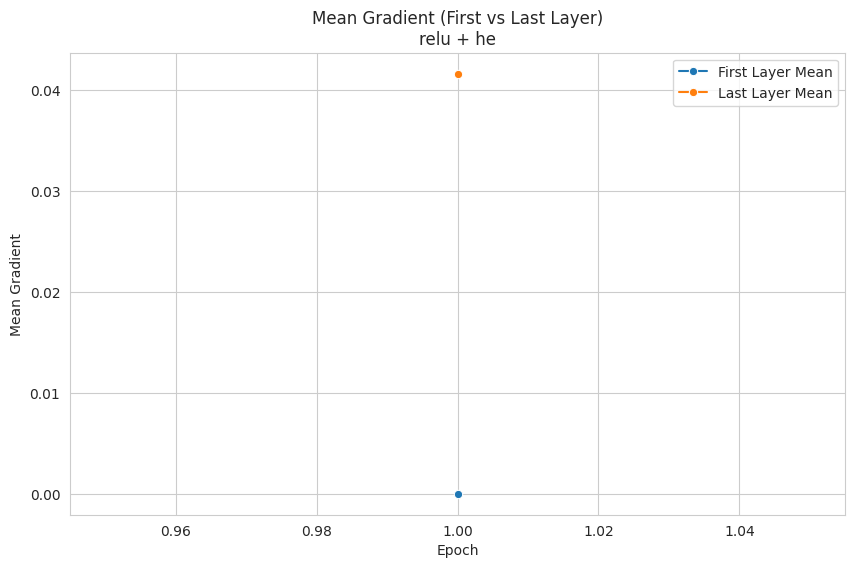

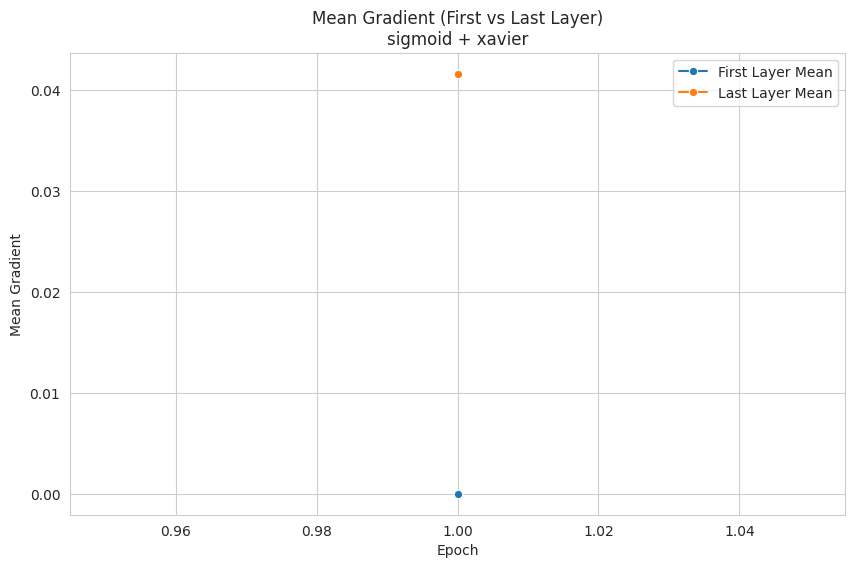

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for res in results:
    logger = res['logger']
    grad_df = pd.DataFrame(logger.stats)

    plt.figure(figsize=(10,6))
    sns.lineplot(data=grad_df, x="epoch", y="first_mean", label="First Layer Mean", marker="o")
    sns.lineplot(data=grad_df, x="epoch", y="last_mean", label="Last Layer Mean", marker="o")

    plt.title(f"Mean Gradient (First vs Last Layer)\n{res['activation']} + {res['init']}")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Gradient")
    plt.legend()
    plt.grid(True)
    plt.show()

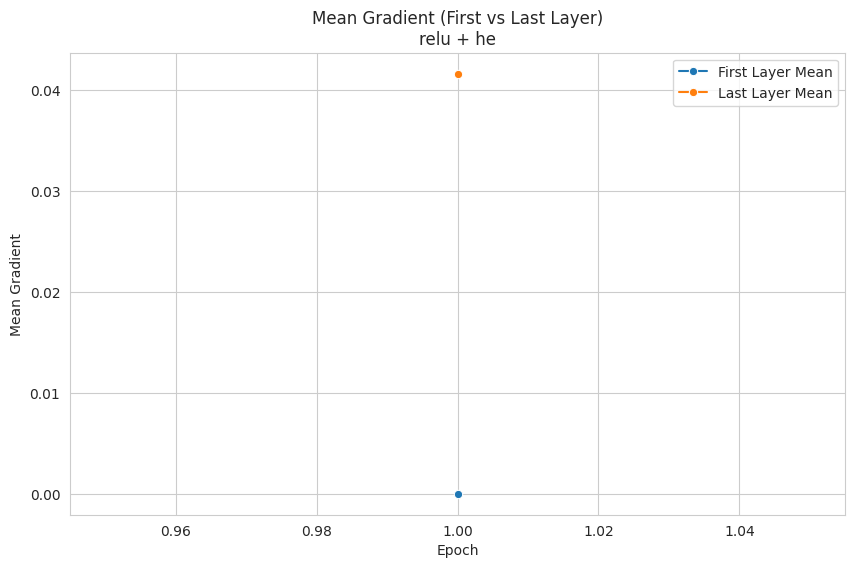

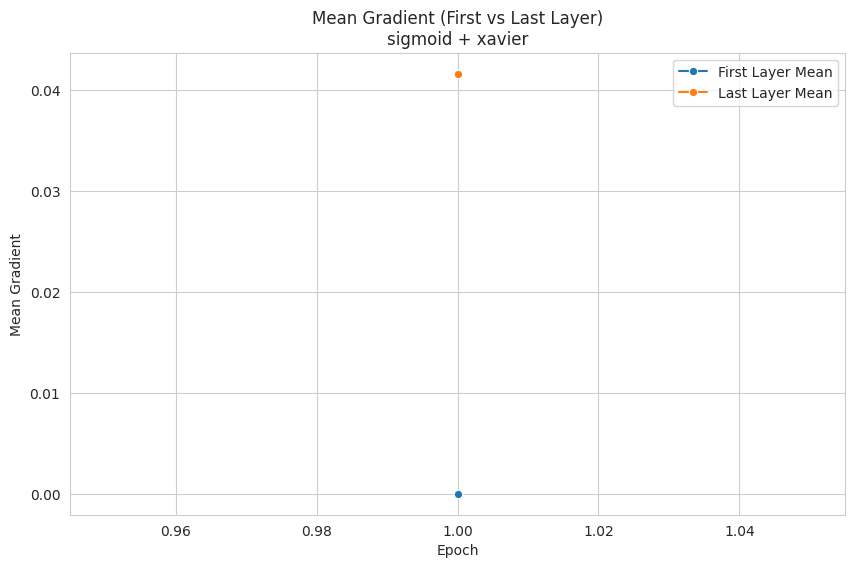

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for res in results:
    logger = res['logger']
    grad_df = pd.DataFrame(logger.stats)
    
    plt.figure(figsize=(10,6))
    sns.lineplot(data=grad_df, x="epoch", y="first_mean", label="First Layer Mean", marker="o")
    sns.lineplot(data=grad_df, x="epoch", y="last_mean", label="Last Layer Mean", marker="o")
    
    plt.title(f"Mean Gradient (First vs Last Layer)\n{res['activation']} + {res['init']}")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Gradient")
    plt.legend()
    plt.grid(True)
    plt.show()

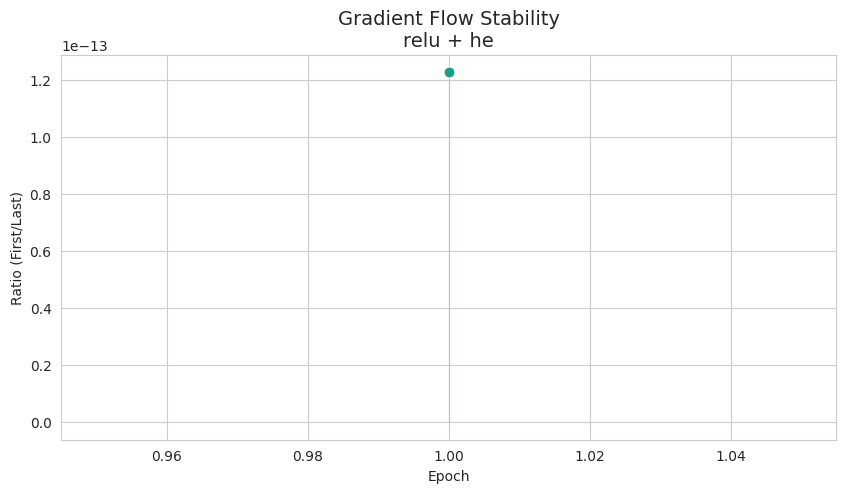

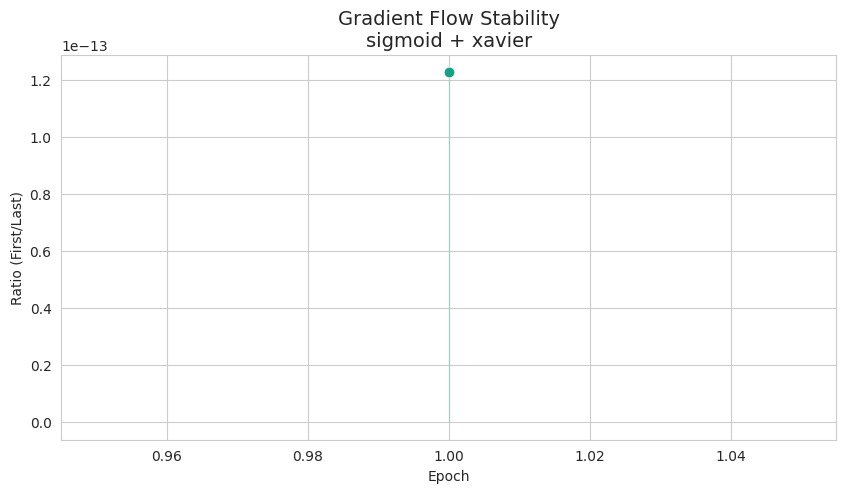

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for res in results:
    logger = res['logger']
    grad_df = pd.DataFrame(logger.stats)
    
    plt.figure(figsize=(10, 5))

    # رسم خط
    sns.lineplot(data=grad_df, x="epoch", y="vanishing_ratio", color="#1ABC9C", linewidth=2)

    # پر کردن زیر نمودار
    plt.fill_between(grad_df["epoch"], grad_df["vanishing_ratio"], color="#1ABC9C", alpha=0.2)

    # اضافه کردن نقاط
    sns.scatterplot(data=grad_df, x="epoch", y="vanishing_ratio", color="#16A085", s=60)

    plt.title(f"Gradient Flow Stability\n{res['activation']} + {res['init']}", fontsize=14)
    plt.ylabel("Ratio (First/Last)")
    plt.xlabel("Epoch")
    plt.grid(True)
    plt.show()

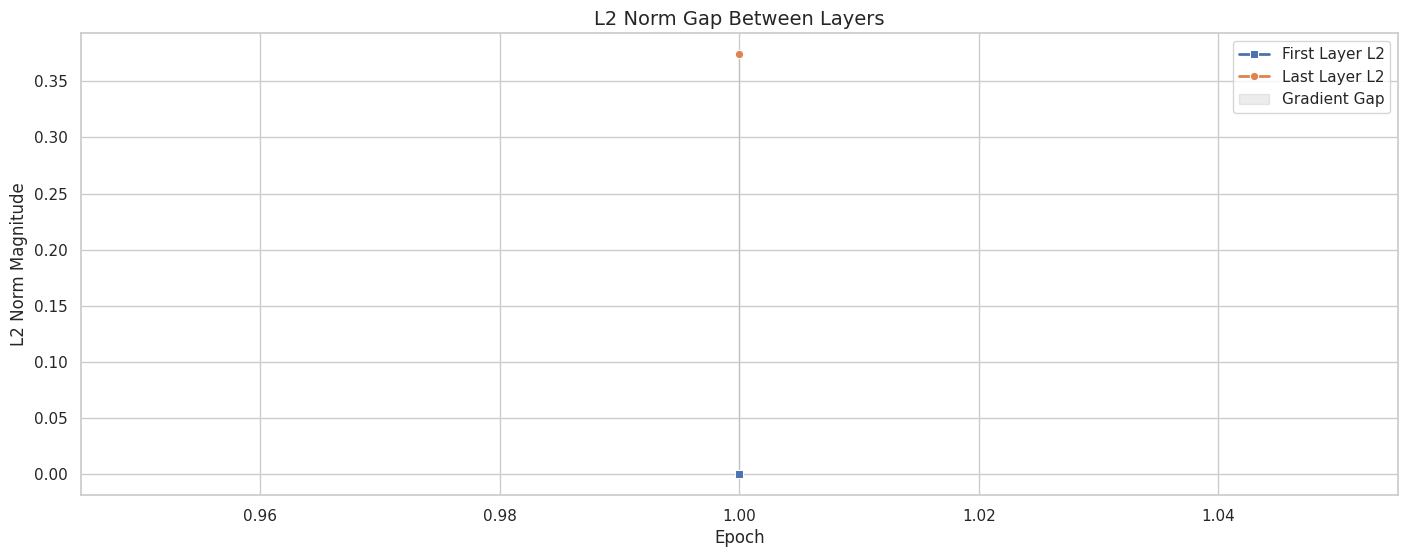

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# melt داده‌ها برای Seaborn
df_melted = grad_df.melt(
    id_vars=['epoch'], 
    value_vars=['first_l2', 'last_l2'], 
    var_name='Layer', 
    value_name='L2_Norm'
)
df_melted['Layer'] = df_melted['Layer'].replace({'first_l2': 'First Layer L2', 'last_l2': 'Last Layer L2'})

plt.figure(figsize=(17, 6))

# رسم خطوط از df_melted
sns.lineplot(data=df_melted, x="epoch", y="L2_Norm", hue="Layer", style="Layer",
             markers=["s","o"], dashes=False, linewidth=2)

# پر کردن فاصله بین دو لایه برای نشان دادن "افت گرادیان"
plt.fill_between(grad_df["epoch"], grad_df["first_l2"], grad_df["last_l2"], color="gray", alpha=0.15, label="Gradient Gap")

plt.title("L2 Norm Gap Between Layers", fontsize=14)
plt.xlabel("Epoch")
plt.ylabel("L2 Norm Magnitude")
plt.legend()
plt.show()